# Увеличение выручки онлайн-магазина

Цели проекта:
- Изучить основные гипотезы для увеличения выручки;
- Провести приоритезацию гипотез;
- Проведение А/В-теста;
- Анализ результатов А/В-теста

## Приоритизация гипотез

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Импортируем библиотеки и загружаем данные.

In [32]:
#Импорт используемых библиотек
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import scipy.stats as stats

In [33]:
#Загрузка данных
hypothesis = pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\hypothesis.csv')
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Применим фреймворк ICE (влияние, уверенность, усилия) для приоритизации гипотез.**

In [34]:
hypothesis ['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Лидируют гипотезы 8, 0, 7, 6. Посмотрим, что изменится при добавлении еще одного параметра в расчеты приоритезации. 

**Применим фреймворк RICE (охват, влияние, уверенность, усилия) для приоритизации гипотез.**

In [35]:
hypothesis ['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending = False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Снова отображены гипотезы 0, 7, 6. Только к ним добавилась гипотеза №2, а 8-ая съехала на 5 место. Посмотрим более детально на влияние параметра охвата ('Reach') на приоритезацию и почему он так повлиял на 8-ую гипотезу.

In [36]:
pd.options.display.max_colwidth = 120
display(hypothesis.sort_values(by='RICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Теперь многое прояснилось. Действительно, влияние 8-ой гипотезы довольно серьезно может сказаться на охваченных пользователей, но это не сравнится с тем, на какое количество людей повлияет 7-ая. 
Немного обратная ситуация происходит со 2 ой гипотезой. Влияние находится на не столь значительном уровне, но при этом оно охватывает большое количество людей. 

Особое внимание уделим гипотезам 0, 6, 7 (1, 7, 8). 8ую и 2ую стоит так же рассмотреть "вдогоночку". 

Точно не стоит рассматривать 1ую и 3юю - слишком трудозатратны для проверки и в них мы мало уверены, а так же не будем рассматривать 5-ую и 4-ую - в них мы так же недостаточно уверены и влияние имеет низкий показатель. 

## Анализ A/B-теста

Был проведен A/B-тест и получен результат, который описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задачa -**
Проанализировать A/B-тест:
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его. 

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

**Загрузка и подготовка датасета**

In [37]:
#Загрузка данных
orders = pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\orders_ab.csv', sep=',')

visitors = pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\visitors_ab.csv', sep=',')

display(orders.head(10))
display(visitors.head(10))

orders.info() 
visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [38]:
orders[~orders.duplicated(keep=False)]
visitors[~visitors.duplicated(keep=False)]

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [39]:
orders.info() 
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [40]:
#подготовка датасета к обработке с помощью lambda-функции (метод функционального программирования для сокращения размера кода):

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим датафрейм на количество групп и даты начала тестов.

In [41]:
#проверим датафрейм на количество групп и даты начала тестов:
print('Дата начала тестов по данным orders:\n',
      orders['date'].min(),"\n","\n",
      'Дата окончания тестов и количество групп по данным orders:\n',
      orders.agg({'date':'max','group':'nunique'}),"\n","\n", 
      'Дата начала тестов по данным visitors:\n',
      visitors['date'].min(),"\n", "\n",
      'Дата окончания тестов и количество групп по данным visitors:\n',
      visitors.agg({'date':'max','group':'nunique'}),"\n","\n")

ordersA = orders[orders['group'] == 'A']
ordersB = orders[orders['group'] == 'B']

print('Количество уникальных пользователей в группе А:\n',
      ordersA.agg({'visitorId':'nunique'}),"\n","\n",
      'Количество уникальных пользователей в группе B:\n',
      ordersB.agg({'visitorId':'nunique'}))

Дата начала тестов по данным orders:
 2019-08-01 00:00:00 
 
 Дата окончания тестов и количество групп по данным orders:
 date     2019-08-31 00:00:00
group                      2
dtype: object 
 
 Дата начала тестов по данным visitors:
 2019-08-01 00:00:00 
 
 Дата окончания тестов и количество групп по данным visitors:
 date     2019-08-31 00:00:00
group                      2
dtype: object 
 

Количество уникальных пользователей в группе А:
 visitorId    503
dtype: int64 
 
 Количество уникальных пользователей в группе B:
 visitorId    586
dtype: int64


Проверим датафреймы на наличие дубликатов посетителей группы А в группе B и наоборот.

In [42]:
unique_visA = ordersA['visitorId'].unique()
unique_visB = ordersB['visitorId'].unique()

checkA = ordersA[ordersA['visitorId'].isin(unique_visB)]
checkB = ordersB[ordersB['visitorId'].isin(unique_visA)]
display(checkA)
display(checkB)

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
26,2223239646,199603092,2019-08-15,3488,A
29,2220299125,3803269165,2019-08-15,700,A
33,486237576,2378935119,2019-08-15,1650,A
41,2594268419,237748145,2019-08-15,1090,A
...,...,...,...,...,...
1167,3757656646,4186807279,2019-08-14,4990,A
1173,3612788481,2712142231,2019-08-14,2490,A
1178,4052155355,2949041841,2019-08-14,190,A
1183,1458356232,963407295,2019-08-14,4940,A


,transactionId,visitorId,date,revenue,group
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
27,1630050528,237748145,2019-08-15,7620,B
32,3666913472,2038680547,2019-08-15,1680,B
...,...,...,...,...,...
1172,3898641900,3803269165,2019-08-14,790,B
1175,1373388206,3717692402,2019-08-14,2400,B
1182,2682156369,1668030113,2019-08-14,1290,B
1184,1329499668,2949041841,2019-08-14,10380,B


Проверка показала, что в группе А есть посетители, которые так же вошли в группу В. Это может помешать дальнейшему анализу тестов. Если мы переведем посетителей группы А в группу В или наоборот - это исказит статистику. 

Удаление данных так же может повлиять на тесты, однако эти посетители уже сейчас мешают нам в трезвой оценке ситуации. 
Так что я вижу единственный выход исключить их из участия в тестах.

In [43]:
not_unique_visitors = checkA.merge(checkB)
not_unique_visitors_list = not_unique_visitors['visitorId'].unique().tolist()
orders = orders[orders['visitorId'].isin(not_unique_visitors_list) == False]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 56.1+ KB


In [44]:
# выделили клиентов, попавших более чем в одну группу
bad_clients = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId']

# отфильтровали по ним
orders = orders.query('visitorId not in @bad_clients')

In [45]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [46]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAgg = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitorId' : 'nunique', 'transactionId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAgg = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeDt = ordersAgg.merge(visitorsAgg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeDt.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeDt.sort_values(by='revenue', ascending = False).head(10)) 

,date,group,orders,buyers,revenue,visitors
61,2019-08-31,B,528,548,5068972,18916
59,2019-08-30,B,511,531,4955833,18198
57,2019-08-29,B,490,510,4746610,17708
55,2019-08-28,B,476,495,4640510,17177
53,2019-08-27,B,456,473,4579312,16523
51,2019-08-26,B,446,462,4467965,15803
49,2019-08-25,B,424,440,4294526,15127
47,2019-08-24,B,412,428,4215269,14448
45,2019-08-23,B,400,414,4127403,14070
43,2019-08-22,B,388,401,4050134,13524


**Построить график кумулятивной выручки по группам. Сделать выводы и предположения.**

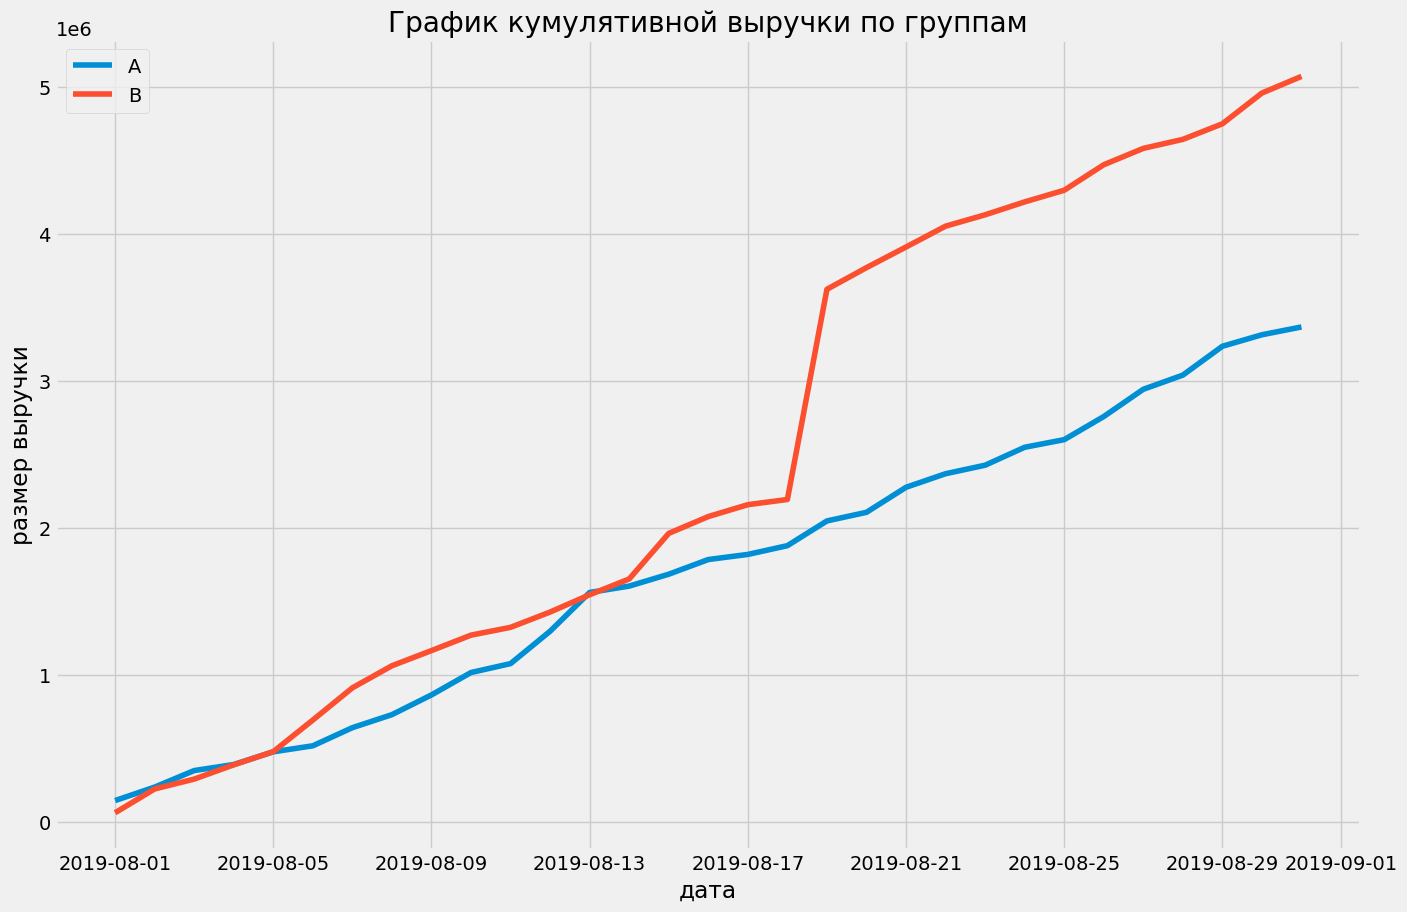

In [47]:
cumulativeRevA = cumulativeDt[cumulativeDt['group']=='A'][['date','revenue', 'orders','visitors']]
cumulativeRevB = cumulativeDt[cumulativeDt['group']=='B'][['date','revenue', 'orders','visitors']]

plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(15, 10))


plt.plot(cumulativeRevA['date'], cumulativeRevA['revenue'], label='A');
plt.plot(cumulativeRevB['date'], cumulativeRevB['revenue'], label='B');


plt.legend(); 
plt.title('График кумулятивной выручки по группам');
plt.xlabel('дата');
plt.ylabel('размер выручки');

После 2019-08-13 группа В начала расти по выручке и далее 2019-08-17 сделала небольшой скачок по выручке. Пока сложно делать какие-то выводы, кроме одного: сегмент В лидирует по накопительной выручке. Проведем дополнительные тесты и посмотрим, связан ли скачок 2019-08-17 с аномальными заказами. 


**Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.**

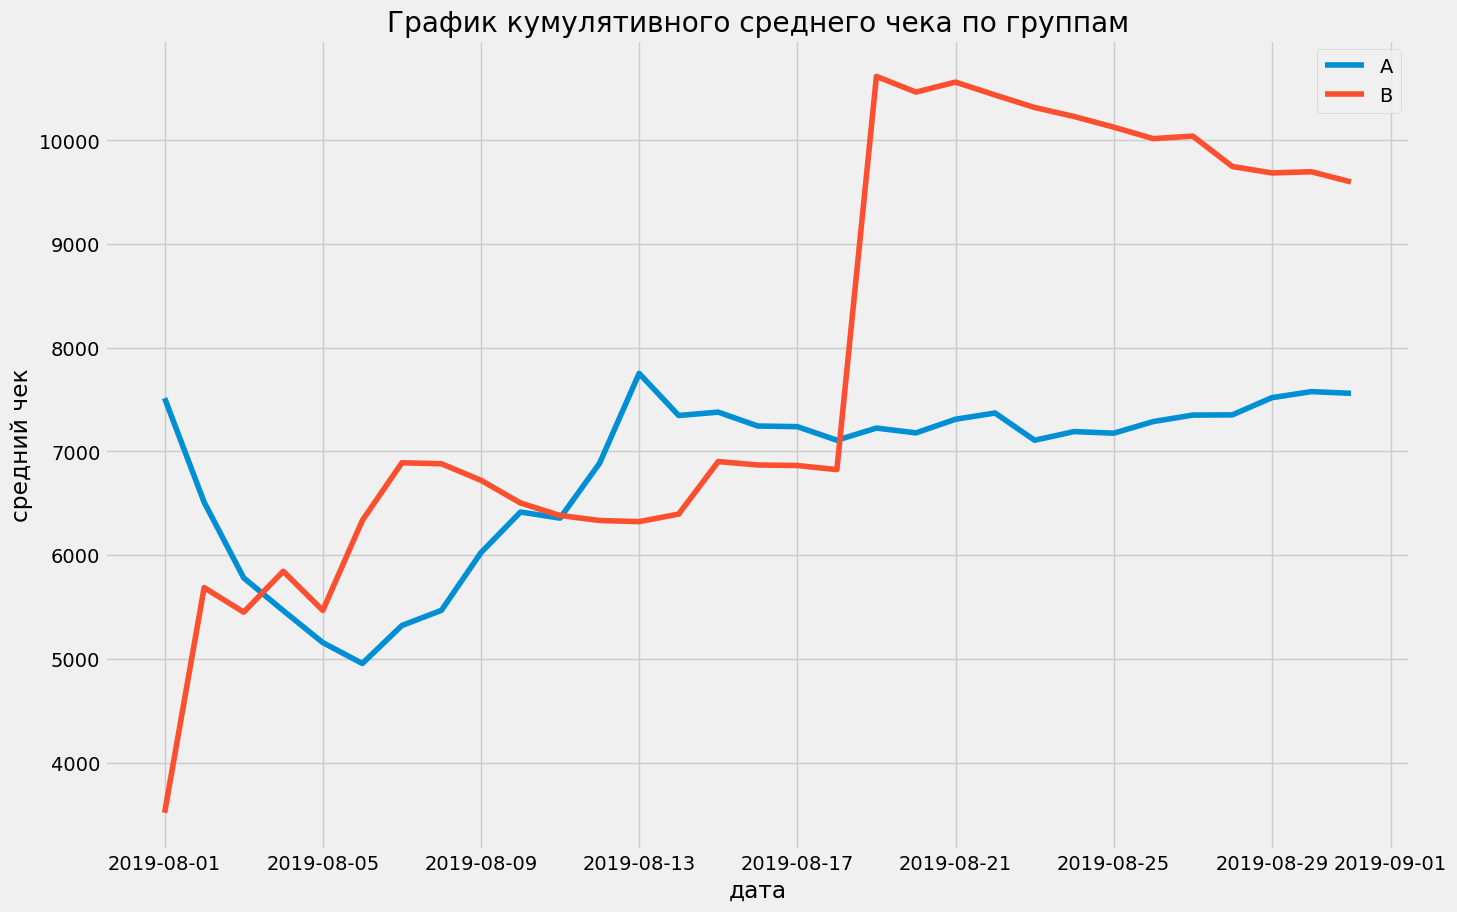

In [48]:
fig = plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevA['date'], cumulativeRevA['revenue']/cumulativeRevA['orders'], label='A');
plt.plot(cumulativeRevB['date'], cumulativeRevB['revenue']/cumulativeRevB['orders'], label='B');

plt.legend(); 
plt.title('График кумулятивного среднего чека по группам');
plt.xlabel('дата');
plt.ylabel('средний чек');

Судя по этому графику, можно предположить, что скачок по кумулятивной выручке все же связан с аномально большими заказами, но как будто бы этих заказов было довольно мало и в единичном случае от 2019-08-17. Дальше график кумулятивного среднего чека начал снижать свои показатели, а график кумулятивной выручки группы B шел почти параллельно группе А. 

**Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.**

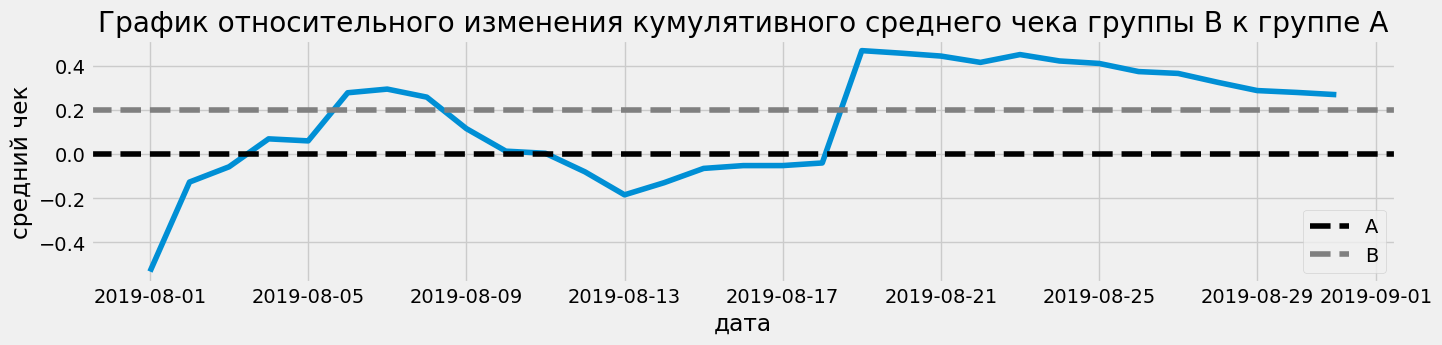

In [49]:
# собираем данные в одном датафрейме
mCumulativeRev = cumulativeRevA.merge(cumulativeRevB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure(figsize=(15, 3))# cтроим отношение средних чеков
plt.plot(mCumulativeRev['date'], (mCumulativeRev['revenueB']/mCumulativeRev['ordersB'])/(mCumulativeRev['revenueA']/mCumulativeRev['ordersA'])-1);

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--', label='A');
plt.axhline(y=0.2, color='grey', linestyle='--', label='B');

plt.legend(); 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');
plt.xlabel('дата');
plt.ylabel('средний чек');

На этом графике мы наблюдаем просадку по средним чекам на одной из недель. Четко видны периоды возможных выбросов и аномальных значений. 

Лидирует сегмент В.

**Построить график кумулятивного среднего количества заказов по группам. Сделать выводы и предположения.**

In [50]:
display(cumulativeRevA)

,date,revenue,orders,visitors
0,2019-08-01,142779,19,719
2,2019-08-02,234381,36,1338
4,2019-08-03,346854,60,1845
6,2019-08-04,388030,71,2562
8,2019-08-05,474413,92,3318
10,2019-08-06,515332,104,3985
12,2019-08-07,638580,120,4629
14,2019-08-08,727219,133,5239
16,2019-08-09,861456,143,5856
18,2019-08-10,1013731,158,6262


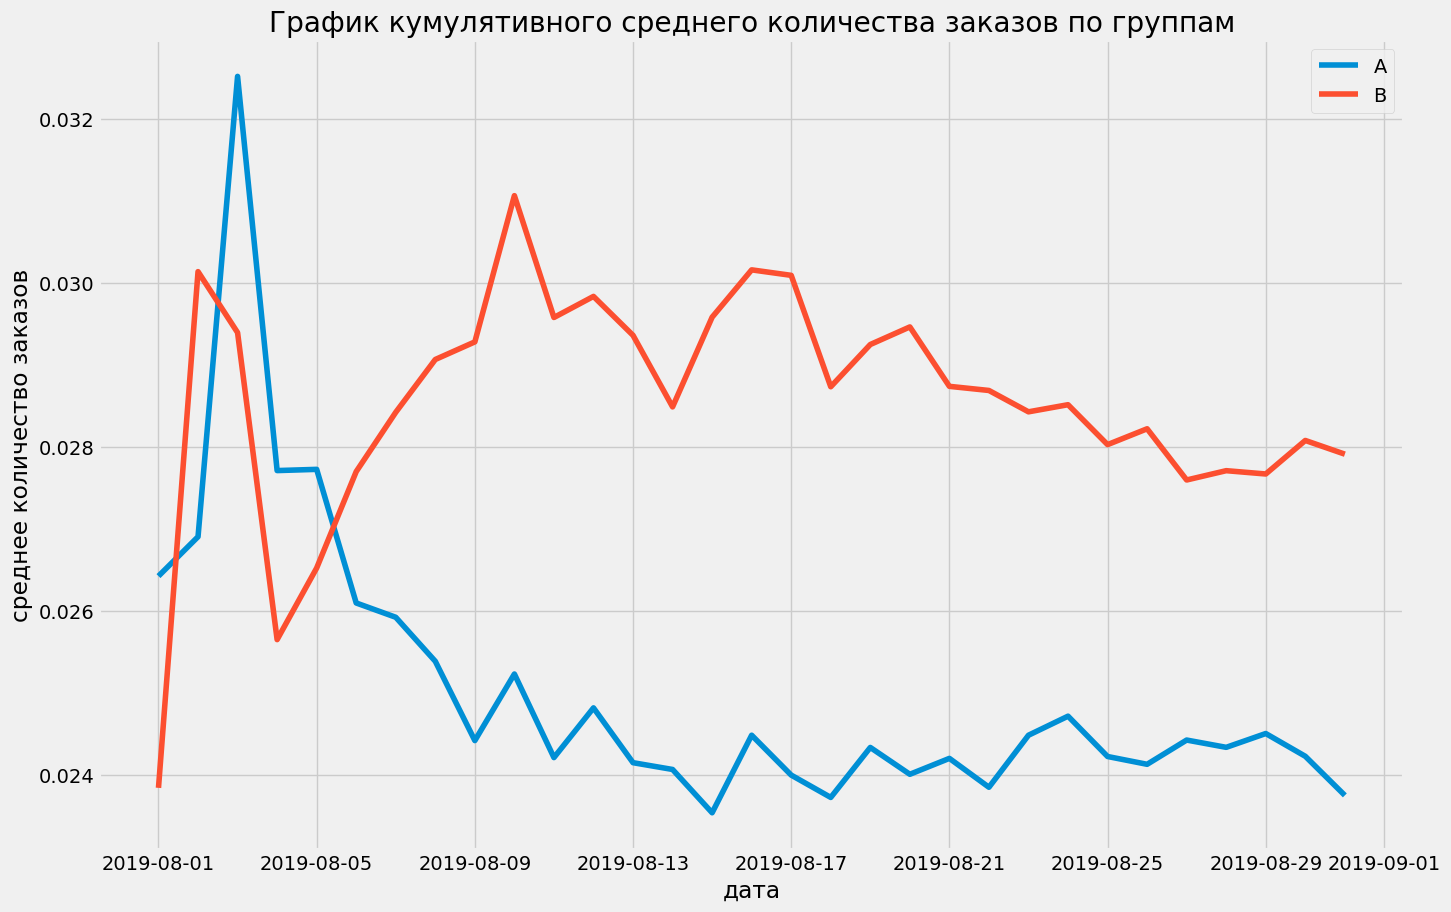

In [51]:
fig = plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevA['date'], cumulativeRevA['orders']/cumulativeRevA['visitors'], label='A');
plt.plot(cumulativeRevB['date'], cumulativeRevB['orders']/cumulativeRevB['visitors'], label='B');

plt.legend(); 
plt.title('График кумулятивного среднего количества заказов по группам');
plt.xlabel('дата');
plt.ylabel('среднее количество заказов');

По кумулятивному среднему количества заказов видно, что лидирует сегмент B. График пестрит выбросами, особенно в первые даты. Но очевидно, что заказов больше в сегменте В.

**Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделать выводы и предположения.**

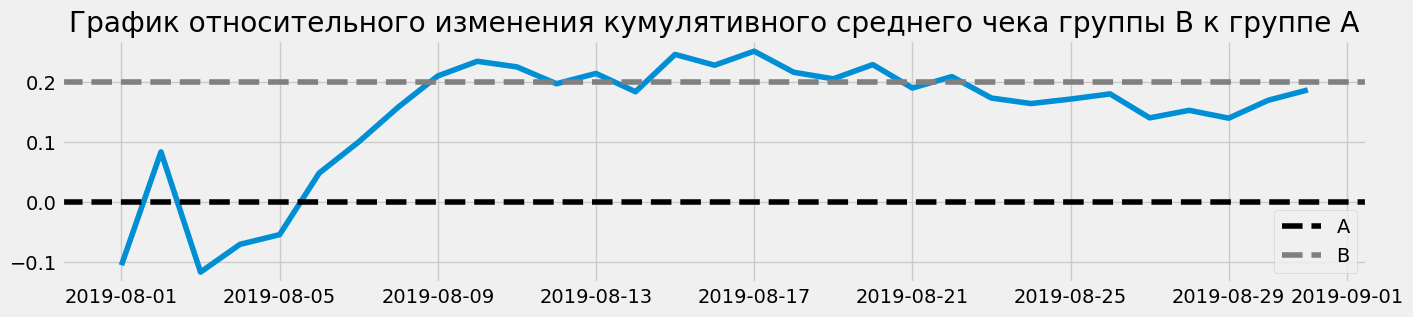

In [52]:
fig = plt.figure(figsize=(15, 3))# cтроим отношение средних чеков
plt.plot(mCumulativeRev['date'], (mCumulativeRev['ordersB'])/(mCumulativeRev['ordersA'])-1);

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--', label='A');
plt.axhline(y=0.2, color='grey', linestyle='--', label='B');

plt.legend(); 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

Есть небольшие колебания по количеству заказов в первую неделю наблюдения. Далее график растет по среднему чеку и "выравнивается" на последних двух неделях. Лидирует сегмент В.

**Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.**

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


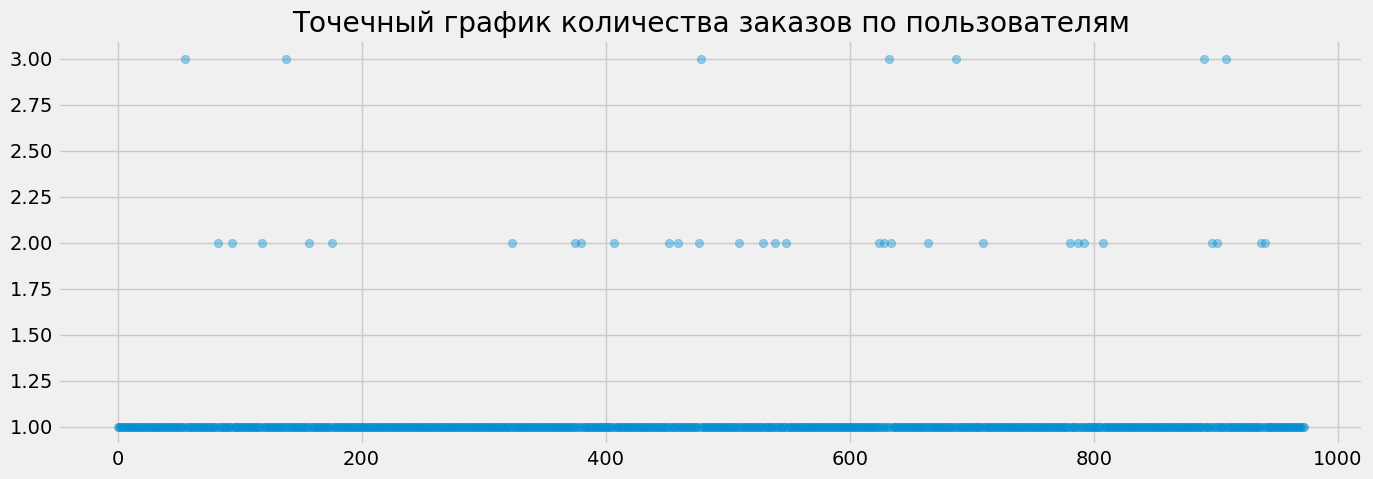

In [53]:
#сгруппируем данные по посетителям с подсчетом уникальных значений заказов
ordersByVis = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

#дадим удобные названия колонкам
ordersByVis.columns = ['visitorId', 'orders']
fig = plt.figure(figsize=(15, 5))

#строим точечный график
x_values = pd.Series(range(0, len(ordersByVis)))
plt.scatter(x_values, ordersByVis['orders'], alpha = 0.4);
display(ordersByVis.sort_values(by='orders', ascending=False).head(10))

plt.title('Точечный график количества заказов по пользователям');

По этому графику видно, что пользователи делают в среднем от одного до 2 заказов в указанный период с начала августа 2019, по начало сентября 2019. Редкие пользователи делают больше двух заказов. Исключительные, можно сказать, аномальные - больше 8-и (может, им за это дают ачивку?:)).


Когда придет время удалять аномальные значение, имеет смысл удалить пользователей, которые сделали больше двух заказов. 

**Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.**

In [54]:

display(ordersByVis.sort_values(by='orders', ascending=False).head(10))

order_95_percent = np.percentile(ordersByVis['orders'], [95])
order_99_percent = np.percentile(ordersByVis['orders'], [99])

print('95-й и 99-й перцентили количества заказов:')
print(np.percentile(ordersByVis['orders'], [95, 99]));

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


95-й и 99-й перцентили количества заказов:
[1. 2.]


Не больше 5% пользователей совершали больше 2-ух заказов. И не более 1% - больше 4-ех.
Все так же следует удалить из расчетов пользователей, которые совершили больше 2ух заказов.

**Построить точечный график стоимостей заказов. Сделать выводы и предположения.**

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


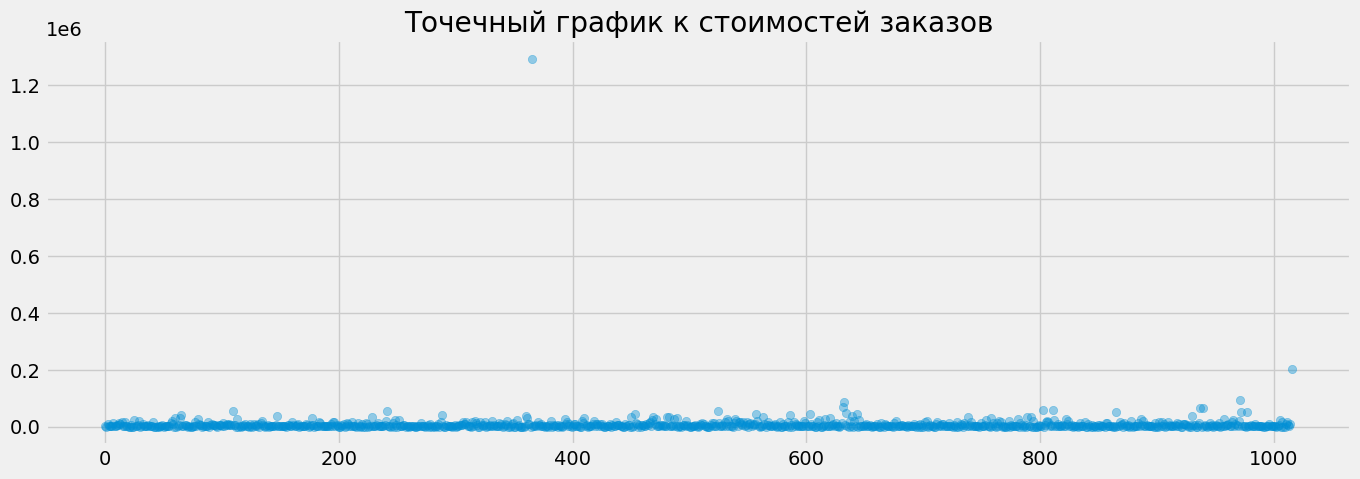

In [55]:
x_values = pd.Series(range(0,len(orders['revenue'])))
display(orders.sort_values(by='revenue', ascending=False).head(10))
fig = plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders['revenue'], alpha = 0.4); 

plt.title('Точечный график к стоимостей заказов');

 Вот они наши аномальные заказы. Двое пользователей заказали товаров больше, чем на 100 тысяч. Один на сумму больше миллиона, другой на сумму больше 200 тысяч. Вряд ли это ошибка в данных. Есть ощущение, что данные взяты с сайта веб-аналитики, потому что остальные данные впорядке. Скорее всего это реальные исключительные пользователи.
 
 Все равно имеет смысл посмотреть, какую долю составляют эти интересные люди и убрать их из уровнения. 

*Построим график без этого выброса в миллион и без выброса в 200 тысяч. Они портят всю картину...*

,transactionId,visitorId,date,revenue,group
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
287,587872075,2254456485,2019-08-24,53904,A
613,4071177889,3931967268,2019-08-07,53904,B
131,3163614039,2254586615,2019-08-22,53904,A


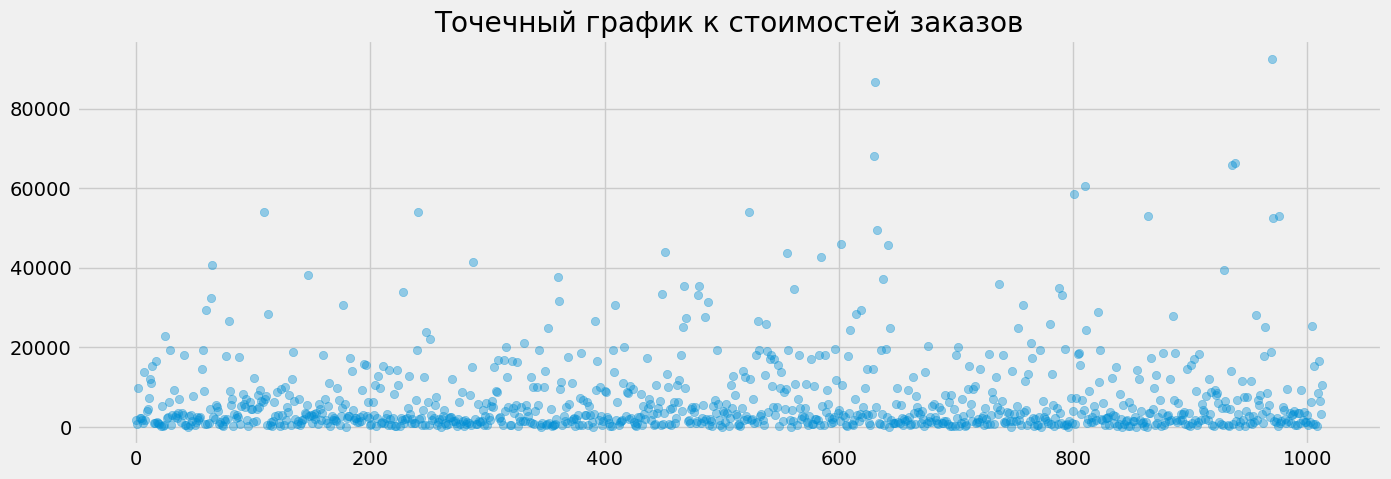

In [56]:
del_rev_blowout = orders[orders['revenue']<= 200000]
x_values = pd.Series(range(0,len(del_rev_blowout['revenue'])))
display(del_rev_blowout.sort_values(by='revenue', ascending=False).head(10))
fig = plt.figure(figsize=(15, 5))
plt.scatter(x_values, del_rev_blowout['revenue'], alpha = 0.4); 

plt.title('Точечный график к стоимостей заказов');

Заказы от 0 до 20 тысяч - самые популярные. Похоже, все-таки в качестве не аномальных стоит рассматривать именно их. В крайнем случае - заказы до 40 000.

**Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.**

In [57]:
display(orders.sort_values(by='revenue', ascending=False).head(10))
revenue_95_percent = np.percentile(orders['revenue'], [95])
revenue_99_percent = np.percentile(orders['revenue'], [99])
print('95-й и 99-й перцентили стоимости заказов:')
print(np.percentile(orders['revenue'], [95, 99]))

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


95-й и 99-й перцентили стоимости заказов:
[26785. 53904.]


Только 5% пользователей заказали товаров больше, чем на 28000 и только 1% на сумму больше, чем 58000.

В качестве границы для определения аномальных заказов сделаем сумму в 58233 руб. 

**Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделать выводы и предположения.**

**0-ая гипотеза:** Статистически значимых различий в среднем количестве заказов, после внедрения изменения на платформу, нет. Внедрять изменения не нужно.

**Альтернативная гипотеза:** Изменения, которые были добавлены на платформу, повлияли на среднее количестве заказов.

In [58]:
#найдем уникальные заказы и сгруппируем их по посетителям.

ordersA = (orders[orders['group'] == 'A']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': pd.Series.nunique})
)
ordersA.columns = ['visitorId', 'orders']
visitorsA = visitors[visitors['group'] == 'A']
                  
ordersB = (orders[orders['group'] == 'B']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': pd.Series.nunique})
)
ordersB.columns = ['visitorId', 'orders']
visitorsB = visitors[visitors['group'] == 'B']

#Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. 
sampleA = pd.concat(
    [
        ordersA['orders'],
        pd.Series(0, index=np.arange(
            visitorsA['visitors'].sum() - len(ordersA['orders'])
        ), 
        name='orders')
    ],axis=0)

sampleB = pd.concat(
    [
        ordersB['orders'],
        pd.Series(0, index=np.arange
            (visitorsB['visitors'].sum() - len(ordersB['orders'])
            ), name='orders')
    ],axis=0)

#Применим тест Манна-Уитни


print('P-value:')
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Влияние (статистическая значимость):')
print("{0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value:
0.01102
Влияние (статистическая значимость):
0.15980


Р-value меньше 0.05. 0-гипотезу отвергаем. Есть статистически значимые различия. По "сырым данным" можно сделать вывод, что имеется прирост по среднему количеству заказов на 13.8 процентов в группе B.

Тестируем дальше. 

**Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.**

**0-ая гипотеза:** Статистически значимых различий в среднем чеке заказа, после внедрения изменения на платформу, нет. Внедрять изменения не нужно.

**Альтернативная гипотеза:** Изменения, которые были добавлены на платформу, повлияли на средний чек заказа.

In [59]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Влияние:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.829
Влияние: 0.287


P-value больше 0.05. По "сырым данным" отвергнуть 0-ую гипотезу не можем. Однако есть влияние в 25% на средний чек. Возможно, влияние выбросов. Нужно проверить. 
Тестируем дальше.

**Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделать выводы и предположения.**

**0-ая гипотеза:** Статистически значимых различий в среднем количестве заказов, после внедрения изменения на платформу, нет. Внедрять изменения не нужно.

**Альтернативная гипотеза:** Изменения, которые были добавлены на платформу, повлияли на количество заказов.

In [60]:
#создадим датасет с посетителями, у которых количество заказов больше 2 и их сумма превышает 30 000. 
usersWithManyOrders = pd.concat(
    [
        ordersA[ordersA['orders'] > 2]['visitorId'],
        ordersB[ordersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [61]:
sampleAFiltered = pd.concat(
    [
        ordersA[
            np.logical_not(ordersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsA['visitors'].sum() - len(ordersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersB[
            np.logical_not(ordersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsB['visitors'].sum() - len(ordersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('P-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Влияние', '{0:.5f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.00702
Влияние 0.18921


Р-value меньше 0.05. 0-гипотезу отвергаем. Есть статистически значимые различия. По "очищенным данным" можно подтвердить выводы, которые мы сделали по сырым. Есть прирост по среднему количеству заказов на 17,4% в группе B - это на 4% больше, чем в сырых данных.

**Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.**

**0-ая гипотеза:** Статистически значимых различий в среднем чеке заказа, после внедрения изменения на платформу, нет. Внедрять изменения не нужно.

**Альтернативная гипотеза:** Изменения, которые были добавлены на платформу, повлияли на средний чек заказа.

In [62]:
print('P-value', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ))

print('Влияние',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )) 

P-value 0.788
Влияние -0.032


Похоже, на средний чек добавление нового функционала на сайт категорически не может повлиять. P-value свыше 0.05 говорит о том, что до тестов средний чек практически не изменился. Тем более что относительное различие между сегментами ушел в минус после удаления аномальных показателей. Изначально влияние в сырых данных было 25%! 

## Принятие решения

Несмотря на то, что на средний чек новый функционал на сайте не оказал, мы видим, что существует прирост по среднему количеству заказов на 18%. 

Можно зафиксировать группу В в качестве лидера, однако есть один фактор, который мог повлиять на количество заказов помимо изменений функционала сайта. Дело в том, что тест проводился в августе, в преддверии начала учебного года. Прирост в количестве заказов (особенно если учесть, что основной рост начался в середине августа) мог быть исключительно из-за того, что люди начали готовиться к учебе и/или возвращаться с отпусков в рутинную осень. 

Перед тем, как делать выводы, было бы здорово взглянуть на категорию покупок. Если там исключительно принадлежности для учебы, имеет смысл продлить тесты до конца сентября. 

Но если основываться исключительно на тех данных, которые мы имеем, то количество заказов действительно стало ощутимо выше в группе B. Можно зафиксировать лидела и остановить тест.  